# PCA & Feature Engineering 

- Bank Customer Churn Dataset

In [1]:
# pip install pandas numpy scikit-learn

### Step 1: Import necessary libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### Step 2: Load the dataset


In [24]:
data = pd.read_csv("bank_customer_churn.csv")


### Step 3: Data Preprocessing


In [25]:
# Drop unnecessary columns (e.g., customer ID, row number, surname)
data = data.drop(columns=["RowNumber", "CustomerId", "Surname"])

### Step 4: Handle Categorical Variables (e.g., one-hot encoding)

In [26]:
data = pd.get_dummies(data, columns=["Geography", "Gender"], drop_first=True)


### Step 5: Data Visualization (Optional)

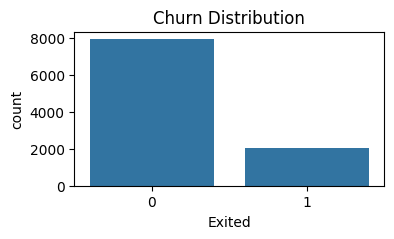

In [27]:
plt.figure(figsize=(4, 2))
sns.countplot(x='Exited', data=data)
plt.title('Churn Distribution')
plt.show()

### Step 6: Split the dataset into features (X) and target (y)

In [28]:
X = data.drop(columns=["Exited"])
y = data["Exited"]

### Step 7: Standardize the data

In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
X_scaled

array([[-0.32622142,  0.29351742, -1.04175968, ..., -0.57873591,
        -0.57380915, -1.09598752],
       [-0.44003595,  0.19816383, -1.38753759, ..., -0.57873591,
         1.74273971, -1.09598752],
       [-1.53679418,  0.29351742,  1.03290776, ..., -0.57873591,
        -0.57380915, -1.09598752],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ..., -0.57873591,
        -0.57380915, -1.09598752],
       [ 1.25683526,  0.29351742, -0.69598177, ...,  1.72790383,
        -0.57380915,  0.91241915],
       [ 1.46377078, -1.04143285, -0.35020386, ..., -0.57873591,
        -0.57380915, -1.09598752]])

### Step 8: Dimensionality Reduction using PCA

In [21]:
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

In [22]:
X_pca

array([[-0.52681948, -0.37601399,  0.96815965, ...,  1.10055534,
         0.70505941, -1.46148022],
       [-0.72631782, -2.09583403,  0.72768532, ...,  0.02500926,
         0.79756978,  0.60456597],
       [ 0.00990015,  2.11637355, -0.14991302, ..., -0.46840873,
        -0.14287754,  1.12452305],
       ...,
       [-0.63017814, -0.4387183 ,  0.76377489, ..., -1.65161102,
         1.24720007, -1.55484418],
       [ 1.08328972,  1.22948038,  0.26427541, ...,  0.6089992 ,
        -1.62055463,  0.56142577],
       [ 0.64563521,  0.01309985, -1.03307167, ...,  0.35961228,
         0.20709931, -0.669726  ]])

### Step 9: Feature Engineering (Example: SelectKBest using ANOVA F-statistic)

In [10]:
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X_scaled, y)

### Step 10: Train-test Split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

### Step 11: Train a Model (Random Forest, for example)

In [12]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Step 12: Evaluate the Model

In [13]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.86
